In [55]:
import torch

In [56]:
x = torch.Tensor([5,3])
y = torch.Tensor([2,4])
print(x*y)

tensor([10., 12.])


In [57]:
x = torch.rand([5,5])
print(x)

tensor([[0.8933, 0.6481, 0.4321, 0.4775, 0.2517],
        [0.2914, 0.6056, 0.6250, 0.7959, 0.3419],
        [0.3949, 0.2170, 0.4193, 0.9222, 0.1711],
        [0.7422, 0.5179, 0.3757, 0.2042, 0.1776],
        [0.8017, 0.8832, 0.1211, 0.2258, 0.7410]])


In [58]:
x.view(1, 25)

tensor([[0.8933, 0.6481, 0.4321, 0.4775, 0.2517, 0.2914, 0.6056, 0.6250, 0.7959,
         0.3419, 0.3949, 0.2170, 0.4193, 0.9222, 0.1711, 0.7422, 0.5179, 0.3757,
         0.2042, 0.1776, 0.8017, 0.8832, 0.1211, 0.2258, 0.7410]])

In [59]:
x

tensor([[0.8933, 0.6481, 0.4321, 0.4775, 0.2517],
        [0.2914, 0.6056, 0.6250, 0.7959, 0.3419],
        [0.3949, 0.2170, 0.4193, 0.9222, 0.1711],
        [0.7422, 0.5179, 0.3757, 0.2042, 0.1776],
        [0.8017, 0.8832, 0.1211, 0.2258, 0.7410]])

In [60]:
x = x.view(1,25)
x

tensor([[0.8933, 0.6481, 0.4321, 0.4775, 0.2517, 0.2914, 0.6056, 0.6250, 0.7959,
         0.3419, 0.3949, 0.2170, 0.4193, 0.9222, 0.1711, 0.7422, 0.5179, 0.3757,
         0.2042, 0.1776, 0.8017, 0.8832, 0.1211, 0.2258, 0.7410]])

In [61]:
import torchvision
from torchvision import transforms, datasets

# Different Datasets

Training dataset -> used to train the model

Test dataset -> dataset unseen by the model used to validate the model

If dataset from the training sample is used to test the model, it could lead to overfit in which case the model will work 
good on insample dataset and will work poverly on out of sample dataset

Balanced Dataset -> Before training the model it is crucial to check if the dataset is balanced, ie.,
for Example in MNIST dataset, if there is 60% of images with 3 as correct label and 40% of all other numbers, then the model will decide that giving output as 3 will be the shortest route to get high probability of correct answer. So, it is necessary to check if all the classes in a dataset is equally distributed.


In [62]:
train = datasets.MNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))

#datasets.MNIST("") --> "" this quotes tells that the dataset to be saved in the local computer in the same place as the python
                        # file. If we want we can specify a specific location in the quotes.
    
# transforms.ToTensor --> transforms the dataset to a Tensor.


test = datasets.MNIST("", train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

In [63]:
train, test

(Dataset MNIST
     Number of datapoints: 60000
     Root location: 
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: 
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

In [64]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

# this is done to set the loading format of the datasets
# batch_size --> We are feeding the model with datch size of 10 inputs, and the model will be optimized each step of the way
# the common batch sized differ from 8 to 64. People tend to use base 8. We do this to generalize the input.
# shuffle --> shuffle is used the shuffle the input therefore increasing the generalization property of the neural network

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle = True)

In [65]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [66]:
# So the above "data" printed out first batch of the train dataset. 
# It gave two tensors. First tensor is the pixels of image, second tensor is the label of what the image represents

x, y = data[0][0], data[1][0] # So here, we are accesing the 0th index image from 0th tensor data[0][0] and 0th index label 
                              # from first index tensor data[1][0]
    
print(y)

tensor(3)


In [67]:
import matplotlib.pyplot as plt

print(x)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [68]:
print(x.shape) # This shape is not a image. In MNIST dataset, Image would be of shape 28 * 28 pixels

torch.Size([1, 28, 28])


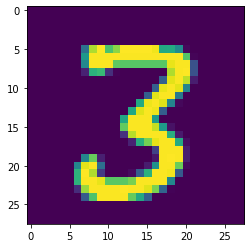

In [69]:
#So,

plt.imshow(x.view(28,28))  # we are using view() function on the "x". view() in torch is similar to reshape() function in numpy
plt.show()

In [70]:
counter = 0

for i in range(0,10):
    for data in trainset:
        for j in range(0,10):
            if i == data[1][j]:
                counter += 1;
    print(i, counter)
    counter = 0

0 5923
1 6742
2 5958
3 6131
4 5842
5 5421
6 5918
7 6265
8 5851
9 5949


In [71]:
counter = [0] * 10

for data in trainset:
    for i in range(0, 10):   # The reason for range 10 is, batch_size in dataloader is 10. So input is loaded for each iteration
        counter[data[1][i]] += 1
#print(counter)

total = 0
for i in range(0,10):          
    print(i, ' ',counter[i])
    total += counter[i]

print('\n', total)

0   5923
1   6742
2   5958
3   6131
4   5842
5   5421
6   5918
7   6265
8   5851
9   5949

 60000


In [50]:
for i in range(0, 10):
    print(i, ': ', round((counter[i]/total)*100, 2))  
    
# This is a pretty balanced dataset

0 :  9.87
1 :  11.24
2 :  9.93
3 :  10.22
4 :  9.74
5 :  9.04
6 :  9.86
7 :  10.44
8 :  9.75
9 :  9.92


In [74]:
import torch.nn as nn    #More like OOP i.e., with class. Here intialize and use the class and its methods.
import torch.nn.functional as F  #Here we just use a specific funtion. Here we pass parameter to a specific function.

In [78]:
# FC1 sctands for Fully connected layer. nn.Liner(input, output) method takes input and 
# output as argumets. Here input is flatend 28*28 image i.e., 784 pixels in a row.
# Our output is going to be 64 neuron hidden layer. We are going to use 3 hideen layers

#So in the below init method, we have and input which is 28*28, three hidden layers that take 64 inputs and give 64 output
#neurons and last layer which has 10 output because there are 10 classes.

class Net(nn.Module):                   # class Net inherits the class nn.Modeule
    
    def __init__(self):                 # defining a __init__ method
        super().__init__()              # runs the _-init__ method in the nn.Module class.
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)   
        self.fc3 = nn.Linear(64, 64)   
        self.fc4 = nn.Linear(64, 10)   # input 28*28 output 64 neurons-->ip 64 op 64-->ip 64 op 64-->ip 64 op 10 neurons
    
    def forward(self, x):              # Feed Forward Funtion. We are going to define how the data flow through the layers
        x = F.relu(self.fc1(x))        # F.relu() whoch stands for Rectified Linear is the activation Function
        x = F.relu(self.fc2(x))        # Activation function runs on Op layer. We run it only on the hidden layers.
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1)   # log_softmax() is used to give a distribution in the Op. dimension = 1 for linear layers
        
net = Net()    #Object of Net() class.
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [84]:
X = torch.rand((28,28))
X = X.view(-1, 28*28)        # -1 means saying don't worry about the input amount, it can be anything

In [87]:
output = net(X)
output

tensor([[-2.4052, -2.2858, -2.3652, -2.3787, -2.1316, -2.4560, -2.1327, -2.2984,
         -2.2939, -2.3307]], grad_fn=<LogSoftmaxBackward>)

In [88]:
X = torch.rand((28,28))
X = X.view(1, 28*28)

In [90]:
output = net(X)
output

tensor([[-2.4062, -2.2996, -2.3658, -2.3927, -2.1344, -2.4310, -2.1415, -2.3025,
         -2.2726, -2.3281]], grad_fn=<LogSoftmaxBackward>)

Loss: Loss is nothing but a prediction error of Neural Net. And the method to calculate the loss is called Loss Function. In simple words, the Loss is used to calculate the gradients. And gradients are used to update the weights of the Neural Net.

Optimizer: Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses based on the losses calculated. Optimizers are used to solve optimization problems by minimizing the function. 

In [91]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001) # lr means learning rate

EPOCHS = 3

for epoch in range(3):                # 3 full passes over the data
    for data in trainset:             # `data` is a batch of featuresets and labels
        X, y = data                   # X is the batch of features, y is the batch of targets i.e., labels.
        net.zero_grad()               # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1, 28*28))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()               # apply this loss backwards thru the network's parameters
        optimizer.step()              # attempt to optimize weights to account for loss/gradients
    print(loss)                       # print loss. We hope loss (a measure of wrong-ness) declines! 

tensor(0.1779, grad_fn=<NllLossBackward>)
tensor(0.0187, grad_fn=<NllLossBackward>)
tensor(0.0046, grad_fn=<NllLossBackward>)


In [92]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))



Accuracy:  0.966


In [95]:
X, y

(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

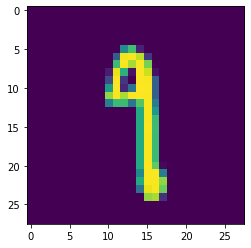

In [102]:
import matplotlib.pyplot as plt

plt.imshow(X[3].view(28,28))
plt.show()

In [101]:
print(torch.argmax(net(X[3].view(-1, 784))[0]))  #3rd index is wrong.

tensor(1)
